In [2]:
import boost_histogram as bh

# Compose axis however you like; this is a 2D histogram
hist = bh.Histogram(bh.axis.Regular(2, 0, 1), bh.axis.Regular(4, 0.0, 1.0))

# Filling can be done with arrays, one per dimension
hist.fill([0.3, 0.5, 0.2], [0.1, 0.4, 0.9])

# NumPy array view into histogram counts, no overflow bins
counts = hist.view()


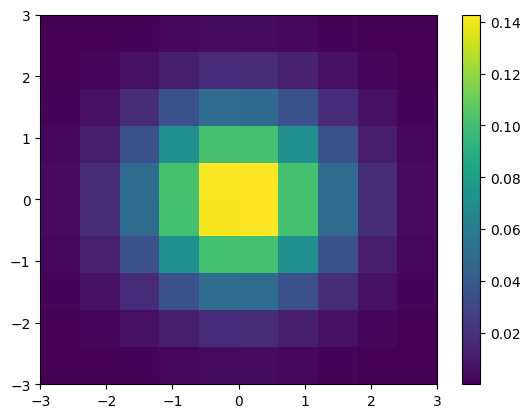

In [31]:
#!/usr/bin/env python3

from __future__ import annotations

import functools
import operator

import matplotlib.pyplot as plt
import numpy as np

import boost_histogram as bh

# Make a 2D histogram
hist = bh.Histogram(bh.axis.Regular(10, -3, 3), bh.axis.Regular(10, -3, 3))

# Fill with Gaussian random values
hist.fill(np.random.normal(size=1_000_000), np.random.normal(size=1_000_000))

# Compute the areas of each bin
areas = functools.reduce(operator.mul, hist.axes.widths)

# Compute the density
density = hist.view() / hist.sum() / areas

# Make the plot
fig, ax = plt.subplots()
mesh = ax.pcolormesh(*hist.axes.edges.T, density.T)
fig.colorbar(mesh)
plt.savefig("simple_density.png")

In [32]:
hist.kind = "MEAN"
hist[0,0]

AttributeError: property 'kind' of 'Histogram' object has no setter

In [33]:
hist.values()

array([[4.9000e+01, 1.9200e+02, 5.3900e+02, 1.0520e+03, 1.5130e+03,
        1.5300e+03, 1.0670e+03, 5.5400e+02, 2.0500e+02, 4.9000e+01],
       [1.8000e+02, 8.1000e+02, 2.1830e+03, 4.4690e+03, 6.2270e+03,
        6.2850e+03, 4.3180e+03, 2.2120e+03, 7.8400e+02, 1.9700e+02],
       [5.6800e+02, 2.2360e+03, 6.2160e+03, 1.2515e+04, 1.7859e+04,
        1.7969e+04, 1.2615e+04, 6.2480e+03, 2.1780e+03, 6.0200e+02],
       [1.1410e+03, 4.3880e+03, 1.2646e+04, 2.5283e+04, 3.5871e+04,
        3.6271e+04, 2.5325e+04, 1.2665e+04, 4.3910e+03, 1.0970e+03],
       [1.5620e+03, 6.0710e+03, 1.7891e+04, 3.5789e+04, 5.0586e+04,
        5.0710e+04, 3.5953e+04, 1.7798e+04, 6.1940e+03, 1.5030e+03],
       [1.5110e+03, 6.3500e+03, 1.7915e+04, 3.6091e+04, 5.1003e+04,
        5.1099e+04, 3.5946e+04, 1.7781e+04, 6.2810e+03, 1.4940e+03],
       [1.0950e+03, 4.3990e+03, 1.2495e+04, 2.5369e+04, 3.6052e+04,
        3.6020e+04, 2.5528e+04, 1.2709e+04, 4.4650e+03, 1.1150e+03],
       [5.6000e+02, 2.0630e+03, 6.2870e+0

In [34]:
hist.kind

<Kind.COUNT: 'COUNT'>